In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic  = sns.load_dataset('titanic')  ### Data of a ship only which can be used to validate

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
titanic.describe(include = 'all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
titanic.isnull().sum()
### 19 % of the data in the column age is missing
### 77% of the data in the column deck is missing

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic.age.describe()  ### I went to think about median

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

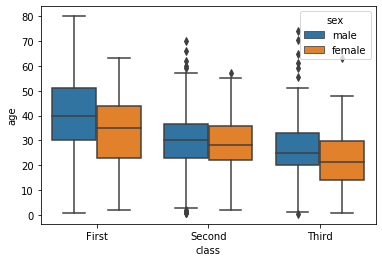

In [6]:
sns.boxplot(x ='class', y = 'age', hue = 'sex',data = titanic)

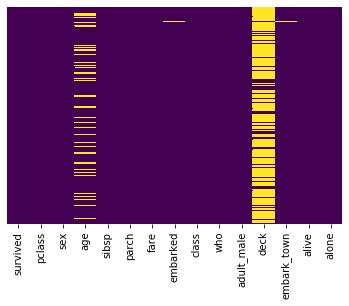

In [29]:
sns.heatmap(titanic.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

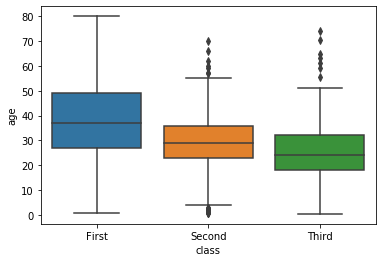

In [7]:
sns.boxplot(x ='class', y = 'age',data = titanic)
### First Class = 37, Second Class = 28, Third Class = 24

In [8]:
titanic['Pclass'] = titanic['class']
#titanic.head()

In [9]:
### 
def input_age(cols):
    age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 28
        else:
            return 24
    else:
        return age

In [10]:
titanic['age'] = titanic[['age','Pclass']].apply(input_age,axis = 1)

In [11]:
titanic = titanic.drop(['class'],axis = 1)

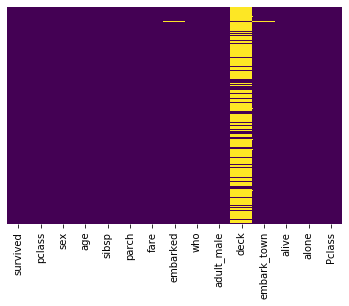

In [12]:
sns.heatmap(titanic.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [13]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,Pclass
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,Third
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,First
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,Third
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,False,First
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,NaN,Southampton,no,True,Second
887,1,1,female,19.0,0,0,30.0000,S,woman,False,B,Southampton,yes,True,First
888,0,3,female,24.0,1,2,23.4500,S,woman,False,NaN,Southampton,no,False,Third
889,1,1,male,26.0,0,0,30.0000,C,man,True,C,Cherbourg,yes,True,First


In [14]:
sex = {'male':0,'female':1}
titanic['sex'] = titanic['sex'].map(sex)

In [15]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,Pclass
0,0,3,0,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,Third
1,1,1,1,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,First
2,1,3,1,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,Third
3,1,1,1,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,False,First
4,0,3,0,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True,Third


In [23]:
titanic.embarked.unique()

array([ 0.,  1.,  2., nan])

In [24]:
embarked = {'S':0,'C':1,'Q':2}
titanic['embarked'] = titanic['embarked'].map(embarked)

In [51]:
##### Which features to use for predicting fare price
#### Build a Regression Model with 70: 30 and 80:20 

In [25]:
y =  titanic.fare   ### This is what we are predicting

In [52]:
import numpy as np
titanic['Log_age'] = np.log(titanic['age'])
titanic = pd.concat([titanic['Log_age']])
X = titanic[['pclass','Log_age','parch']]

#y=  a + b1x1 + b2x2 + b3x3

#y = (a+ b1 *pclass + b2*Log_age + b3*parch + c)

KeyError: 'age'

KeyError: 'Log_Age'

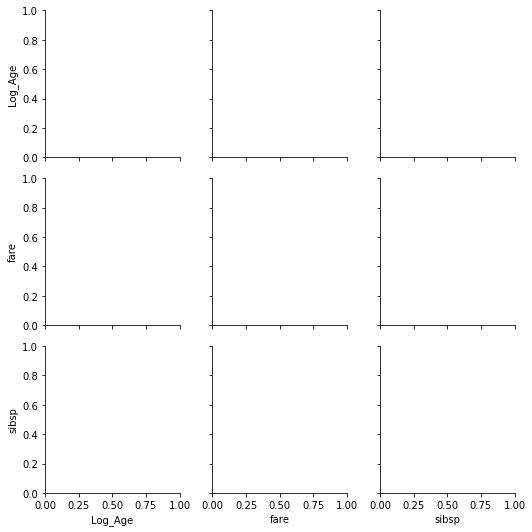

In [27]:
sns.pairplot(titanic,vars=['Log_Age','fare','sibsp'])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [22]:
X.head()

,pclass,embarked,parch
0,3,0.0,0
1,1,1.0,0
2,3,0.0,0
3,1,0.0,0
4,3,0.0,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state = 10000)

In [33]:
y_train.shape,y_test.shape

((356,), (535,))

In [34]:
X_train.shape,X_test.shape

((356, 3), (535, 3))

In [35]:
model = LinearRegression()
model_fit = model.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [149]:
model_fit.coef_

array([-34.03955209,  -0.57060733,  17.2130984 ])

In [150]:
model_fit.score(X_train,y_train)

0.3513640608192353

In [56]:
import numpy as np
titanic['Log_Age'] = np.sqrt(titanic['age'])

KeyError: 'age'

In [141]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,Pclass,Log_Age
0,0,3,0,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,Third,4.690416
1,1,1,1,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,First,6.164414
2,1,3,1,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,Third,5.099020
3,1,1,1,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,False,First,5.916080
4,0,3,0,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True,Third,5.916080


In [137]:
2
log(2)

NameError: name 'log' is not defined

In [54]:
np.log(2)

0.6931471805599453

In [55]:
np.sqrt(2)

1.4142135623730951

In [ ]:
### Descriptive Analytics
### Diagonistic
### Predictive Modelling   #### 

In [151]:
df = titanic

In [153]:
df.to_csv("C:\\Users\\proyas.bose\\Desktop\\ship.csv")

In [ ]:
Dataframe.columnName.str.split(" ")